In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 2:  Root Finding and Optimization

## Question 1 - Finding the Root

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  One way to do this is to solve for the zeros of the function $f(x) = x^2 - M$.

 - Note that not all the methods will work!
 - Make sure to handle the case where $M_0 = \sqrt{M}$.
 - We are only looking for the positive root of $f(x)$.

**(a)** (5 points) Write a function that uses fixed-point iteration to solve for the zeros of $f(x)$.  

Note: There are multiple ways to write the iteration function $g(x)$, some work better than others.  Make sure to use the input function $f(x)$ to formulate this.

In [2]:
def fixed_point(x_0, f, tolerance):
    """Find the zeros of the given function f using fixed-point iteration
    
    :Input:
     - *x_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *x* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # INSERT CODE HERE
    g = lambda x: f(x) + x #setup the iteration scheme function
    
    #initialize variables and check tolerance before beginning
    x = x_0
    if numpy.abs(f(x)) < tolerance:
            return x, 0
    
    #loop - x_n+1 = f(x_n) + x_n = g(x_n)
    for steps in xrange(1,MAX_STEPS+1):
        #print "x: ", x
        diff = g(x) - x
        #print "Residual: ", diff
        x = g(x)
        if numpy.abs(f(x)) < tolerance:
            return x, steps
    return x, -1

In [3]:
M = 1.8
TOLERANCE = 1e-10
f = lambda x: x**2 - M

# Note that this test probably will fail
try:
    M_f, n = fixed_point(2.0, f, TOLERANCE)
except OverflowError:
    print "Fixed-point test failed!"
    print "Success!"
else:
    if n == -1:
        print "Fixed-point test failed!"
        print "Success!"
    else:
        print M_f, n
        raise ValueError("Test should have failed!")

Fixed-point test failed!
Success!


**(b)** (5 points) Write a function that uses Newton's method to find the roots of $f(x)$. The analytical derivative of $f'(x)$ is provided.

In [4]:
def newton(x_0, f, f_prime, tolerance):
    """Find the zeros of the given function f using Newton's method
    
    :Input:
     - *M_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *f_prime* (function) - The derivative of *f*
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # INSERT CODE HERE
    x_k = x_0
    if numpy.abs(f(x_k)) < tolerance:
        return x_k, 0
    
    for n in xrange(1,MAX_STEPS+1):
        x_k = x_k - (f(x_k)/f_prime(x_k))
        if numpy.abs(f(x_k)) < tolerance:
            return x_k, n
    return x, -1

In [5]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M
f_prime = lambda x: 2.0 * x

M_f, n = newton(2.0, f, f_prime, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print M_f, n
assert(n == 4)

M_f, n = newton(numpy.sqrt(M), f, f_prime, TOLERANCE)
print M_f, n
assert(n == 0)

print "Success!"

1.73205080757 4
1.73205080757 0
Success!


**(c)** (5 points) Write a function to find the zeros of $f(x)$ using the secant method.

In [6]:
def secant(x_0, f, tolerance):
    """Find the zeros of the given function f using the secant method
    
    :Input:
     - *x_0* (list of 2 floats) - Initial bracket
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # INSERT CODE HERE
    x_k = x_0[1]
    x_km = x_0[0]
    
    if numpy.abs(f(x_k)) < tolerance:
            return x_k, 0
    
    for n in xrange(1,MAX_STEPS+1):
        x_kp = x_k - ((f(x_k)*(x_k-x_km)) / (f(x_k) - f(x_km)))
        x_km = x_k
        x_k = x_kp
        if numpy.abs(f(x_k)) < tolerance:
            return x_k, n
    return x, -1

In [7]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M

M_f, n = secant([0.0, 3.0], f, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print M_f, n
assert(n == 7)

M_f, n = secant([1.0, numpy.sqrt(M)], f, TOLERANCE)
assert(n == 0)

print "Success!"

1.73205080757 7
Success!


**(d)** (5 points) Using the theory and illustrative plots why the fixed-point method did not work (pick a bracket that demonstrates the problem well).  

The range is not contained within the domain and therefore fixed-point iteration will not converge.  The plot below should be included.

(0.05857992595400119, -1)


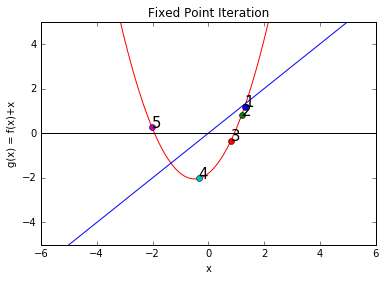

In [8]:
M = 1.8
x = numpy.linspace(-5,5, 100)
TOLERANCE = 1e-10
f = lambda x: x**2 - M

MAX_STEPS = 5

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(x, f(x)+x, 'r')
axes.plot(x,x,'b')
axes.set_xlabel("x")
axes.set_ylabel("g(x) = f(x)+x")
axes.set_title("Fixed Point Iteration")
axes.set_ylim([-5, 5])
plt.axhline(y = 0, xmin=-5, xmax=5, linewidth=1, color = 'k')
print fixed_point(1.3, f, TOLERANCE)

xn = 1.3
for steps in xrange(1,MAX_STEPS+1):
    #print "plotting:", xn, f(xn)+xn
    axes.plot(xn, f(xn) + xn, 'o')
    axes.text(xn, f(xn)+xn, steps, fontsize='15')
    xn = f(xn) + xn
plt.show()


**Comments**

In part a, we chose a generic iteration scheme $g(x) = f(x) + x$. In this case:

$$g(x) = x^2 + x - M$$

$$g'(x) = 2x + 1$$

Therefore, for x0 > 0, say x0 = 2, this will diverge as the derivative is positive. However, if we choose a negative x0, the function converges to a negative root. Thus, our iteration scheme fails.

## Question 2 - Bessel Function Zeros

The zeros of the Bessel functions $J_0(x)$ can be important for a number of applications.  Considering only $x \geq 0$ 
we are going to find the first ten zeros of $J_0(x)$ by using a hybrid approach.

**(a)** (5 points) Plot the Bessel function $J_0(x)$ and its zeros on the same plot.  Note that the module `scipy.special` contains functions dealing with the Bessel functions (`jn`).

[  2.40482556   5.52007811   8.65372791  11.79153444  14.93091771
  18.07106397  21.21163663  24.35247153  27.49347913  30.63460647]


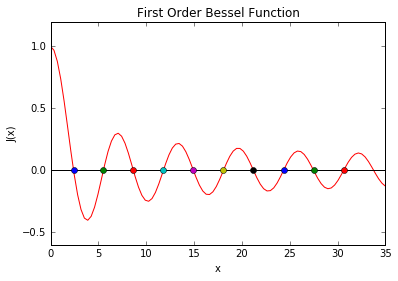

In [9]:
import scipy.special as sp

x = numpy.linspace(0,35,100)

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(x,sp.jn(0,x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("J(x)")
axes.set_title("First Order Bessel Function")
plt.axhline(y = 0, xmin=-5, xmax=5, linewidth=1, color = 'k')

bessel_roots = sp.jn_zeros(0,10)
print bessel_roots
for root in bessel_roots:
    axes.plot(root, sp.jn(0,-1*root), 'o')

plt.show()

**(b)** (15 points) Now write a function `j0_zeros` that takes two tolerances, a bracket size tolerance `bracket_tolerance` and `tolerance` for the final convergence tolerance.  Given an initial bracket, the function should perform secant iterations until the bracket size is less than `bracket_tolerance`.  If this is successful then proceed with Newton's method using the newest value of the bracket until `tolerance` is reached.  Return both the zero found and the number of steps needed in each iteration.  Also write a `doc-string` for the function.

Notes:
 - Newton's method by itself does not work here given the initial brackets provided.
 - The secant method does work however it is slower than the approach outlined.
 - Try playing a bit yourself with the tolerances used.

In [10]:
import scipy.special

# Note that the num_steps being returned should be a list 
# of the number of steps being used in each method
def j0_zeros(x0, bracket_tolerance, tolerance):
    """Find the zeros of the first order bessel function using a hybrid secant/newton method
    
    :Input:
     - *x_0* (list of 2 floats) - Initial bracket
     - *bracket_tolerance* (float) - Stopping tolerance for bracket size in secant iteration
     - *tolerance* (float) - Stopping tolerance for newton iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # INSERT CODE HERE
    MAX_STEPS = 1000
    
    #Secant Method
    x_k = x0[1]
    x_km = x0[0]
    sec_steps = 0
    sec_success = False
    
    if numpy.abs(x_k - x_km) < bracket_tolerance:
        sec_steps = 0
        sec_success = True
    else:
        for n in xrange(1,MAX_STEPS+1):
            x_kp = x_k - ((scipy.special.jn(0,x_k)*(x_k-x_km)) / (scipy.special.jn(0,x_k) - scipy.special.jn(0,x_km)))
            x_km = x_k
            x_k = x_kp
            #if numpy.abs(scipy.special.jn(0,x_k) - scipy.special.jn(0,x_km)) < bracket_tolerance:
            if numpy.abs(x_k - x_km) < bracket_tolerance:
                sec_steps = n
                sec_success = True
                break
    if sec_success == False:
        return x_k, -1
    
    #print x_k, sec_steps, sec_success
    
    #newtons method
    x_kn = x_k
    
    if numpy.abs(scipy.special.jn(0,x_kn)) < tolerance:
        return x_kn, sec_steps
    
    for n in xrange(1,MAX_STEPS+1):
        x_kn = x_kn - (scipy.special.jn(0,x_kn)/scipy.special.jvp(0,x_kn,1))
        if numpy.abs(scipy.special.jn(0,x_kn)) < tolerance:
            return x_kn, n + sec_steps
    return x_kn, -1



In [11]:
brackets = [[ 2.0,  3.0], [ 4.0,  7.0], [ 7.0, 10.0], [10.0, 12.0], 
            [13.0, 15.0], [17.0, 19.0], [19.0, 22.0], 
            [22.0, 26.0], [26.0, 29.0], [29.0, 32.0]]

zero = []
for bracket in brackets:
    x, num_steps = j0_zeros(bracket, 1e-1, 1e-15)
    print x, num_steps
    zero.append(x)
numpy.testing.assert_allclose(zero, scipy.special.jn_zeros(0, 10), rtol=1e-14)
print "Success!"

2.4048255577 5
5.52007811029 6
8.65372791291 5
11.791534439 5
14.9309177085 4
18.0710639679 4
21.2116366299 5
24.3524715307 6
27.493479132 5
30.6346064684 5
Success!


## Question 3 - Newton's Method Convergence

Recall that Newton's method converges as

$$|\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2$$

with $\epsilon_n = x_n - x^*$ where $x^*$ is the true solution and $c$ is between $x_n$ and $x^*$.

**(a)** (10 points) Show that the Newton iteration when $f(x) = x^2 - M$ with $M > 0$ is

$$x_{n+1} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

General Newton Iteration Scheme:

$$x_{k+1} = x_k-\frac{f(x_k)}{f'(x_k)}$$

Plugging in with $f(x) = x^2 - M$ and $f'(x) = 2x$:

$$x_{n+1} = x_n-\frac{x_n^2 - M}{2x_n}$$

$$x_{n+1} = x_n-\frac{x_n - \frac{M}{x_n}}{2}$$

$$x_{n+1} = x_n-\frac{1}{2}(x_n - \frac{M}{x_n})$$

$$x_{n+1} = x_n-\frac{x_n}{2}+\frac{M}{2x_n}$$

$$x_{n+1} = \frac{x_n}{2}+\frac{M}{2x_n} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

**(b)** (10 points) From this update scheme show that 

$$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

**Solution**

From part a, we know that:

$$x_{n+1} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

Subracting by $\sqrt{M}$

$$x_{n+1} - \sqrt{M} = \frac{x_n}{2} + \frac{M}{2x_n} - \sqrt{M}$$

$$x_{n+1} - \sqrt{M} = \frac{1}{2x_n}(x_n^2 + M - 2\sqrt{M}x_n)$$

Notice that $(x_n^2 + M - 2\sqrt{M}x_n) = (x_n - \sqrt{M})^2$:

$$x_{n+1} - \sqrt{M} = \frac{1}{2x_n}(x_n - \sqrt{M})^2$$

$$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

**(c)** (10 points) Confirm that the asymptotic error convergence matches the general convergence for Newton's method.

Let $g(x) = x - \frac{f(x)}{f'(x)}$, then:

$$x_{k+1} = g(x_k) = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

We know that by taylor expansion:

$$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \ldots$$

Solving for $g'(x)$:

$$g'(x) = \frac{1}{2} - \frac{M}{2x_n^2}$$

Since $g(x^*) = 0 \rightarrow (x^*)^2 = M$. Thus:

$$g'(x) = \frac{1}{2} - \frac{1}{2} = 0$$

Simplfying our expressions:

$$e_{k+1} = \frac{g''(x^*) e_k^2}{2!} + \ldots$$

$$g''(x) = \frac{M}{(x^*)^3} = \frac{1}{x^*}$$

$$e_{k+1} = \frac{1}{2x^*}e_k^2 $$

We can see this is equivalent to the general Newton Convergence:

$$|\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2$$

Recall $f''(c) = 2$ and $f'(x_n) = 2x_n$

$$e_{k+1} = \frac{2}{4x_n}e_k^2 $$

$$e_{k+1} = \frac{1}{2x_n}e_k^2 $$

## Question 4 - Optimization of a Data Series

For the following questions we are given a set of data $(t_0, y_0), (t_1, y_1), \ldots, (t_N, y_N)$.

**(a)** (15 points) Write a function that takes in the data series $(t_i, y_i)$ and finds the value at a point $t_\ast$ by constructing the equation of the line between the two data points that bound $t_\ast$ and evaluating the resulting function at $t_\ast$.  Write a `doc-string` for the function.

Hints:
 - Make sure to handle the case that $t_\ast = t_i$.
 - If $t_\ast < t_0$ or $t_\ast > t_N$ then return the corresponding value $y_0$ or $y_N$.
 - If you write your function so that $t_\ast$ can be an array you can use the plotting code in the cell.  Otherwise just delete it.

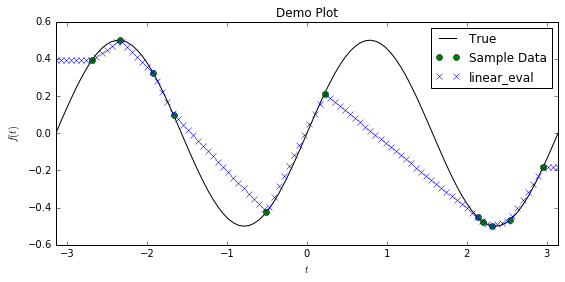

In [12]:
def linear_eval(t, y, t_star):
    """Find the value at a point t* given a data series (t_i, y_i)
    
    :Input:
     - *t* (t values in data series) - t0, t1, ... t_N (1darray)
     - *y* (f(t) or y values in data series) - y0, y1, ... y_N (1darray)
     - *t_star* - value we want to evaluate the data series at (1darray) 
     
    :Output:
    If our t_star is within t_0 and t_N:
     - *y_star* - value returned from evaluating data series at t_star
    otherwise
     - *y_star* - y0 if t_star was less than t0 and y_N if t_star was greater than t_N  
    """
    
    # INSERT CODE HERE
    # Want t* to be an array so we convert it to one 
    if type(t_star) is not type(t):
        t_star = numpy.array([float(t_star)])
    
    y_star = []
    
    #loop on each t* and first check if its in t0<t*<t_N
    for n in xrange(0, len(t_star)):
        t_eval = t_star[n]
        if (t_eval < t[0]):
            y_star.append(y[0])
        elif (t_eval > t[N]):
            y_star.append(y[N])
        else:
            i = 0
            #find the upper bound on our t* value
            while (t[i] <= t_eval):
                i = i + 1
            if (t[i] == t_eval):
                y_star.append(y[i])
            else:
                #get the equation of a line
                x1 = t[i-1]
                x2 = t[i]
                y1 = y[i-1]
                y2 = y[i]
                m = (y2 - y1) / (x2 - x1)
                b = (y1) - (m * x1)
                lin_f = lambda x: m*x + b
                y_star.append(lin_f(t_eval))
    return y_star

N = 10
t_fine = numpy.linspace(-numpy.pi, numpy.pi, 100)
t_rand = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
t_rand.sort()
f = lambda x: numpy.sin(x) * numpy.cos(x)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*1.5)
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_fine, f(t_fine), 'k-', label="True")
axes.plot(t_rand, f(t_rand), 'og', label="Sample Data")
axes.plot(t_fine, linear_eval(t_rand, f(t_rand), t_fine), 'xb', label="linear_eval")
axes.set_xlim((-numpy.pi, numpy.pi))
axes.set_title("Demo Plot")
axes.set_xlabel('$t$')
axes.set_ylabel('$f(t)$')
axes.legend()
plt.show()

In [13]:
N = 10
f = lambda x: numpy.sin(x) * numpy.cos(x)
t = numpy.linspace(-1, 1, N + 1)
t_star = 0.5

numpy.testing.assert_almost_equal(linear_eval(t, f(t), t_star), f(t_star), verbose=True, decimal=2)
print "Success!"

N = 100
f = lambda x: numpy.sin(x) * numpy.cos(x)
t = numpy.linspace(-1, 1, N + 1)
t_star = 0.5
answer = linear_eval(t, f(t), t_star)
if isinstance(answer, list):
    answer = answer[0]
print "Computed solution: %s" % answer
print "True solution: %s" % f(t_star)
numpy.testing.assert_almost_equal(answer, f(t_star), verbose=True, decimal=7)
print "Success!"

Success!
Computed solution: 0.420735492404
True solution: 0.420735492404
Success!


**(b)** (10 points) Using the function you wrote in part (a) write a function that uses Golden search to find the minimum of a series of data.  Again you can use the plotting code available if your `linear_eval` function from part (a) handles arrays.  Write a `doc-string` for the function.

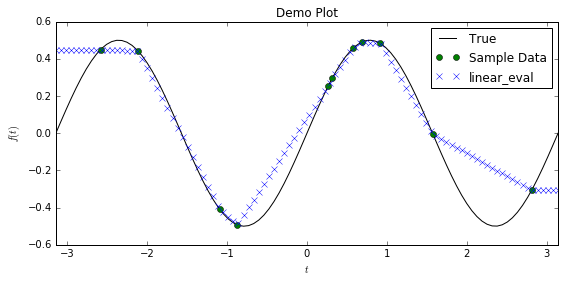

In [21]:
def golden_search(bracket, t, y, max_steps=100, tolerance=1e-4):
    """Find the value at a point t* given a data series (t_i, y_i)
    
    :Input:
     - *bracket* - list of two elements representing initial places to eval function
     - *t* - list of values to evaluate (ndarray)
     - *y* - (f(t) or y values in data series) - y0, y1, ... y_N (1darray)
     
    :Output:
    If our t_star is within t_0 and t_N:
     - *t_star* - value returned from evaluating data series at t_star 
    """
    
    phi = (numpy.sqrt(5.0) - 1.0) / 2.0
    

    # INSERT CODE HERE
    z = [bracket[0], None, None, bracket[1]]
    z[1] = z[3] - phi * (z[3] - z[0])
    z[2] = z[0] + phi * (z[3] - z[0])
    
    for n in xrange(1, max_steps + 1):
        f_1 = linear_eval(t, y, z[1])
        f_2 = linear_eval(t, y, z[2])

        if f_1 > f_2:
            z[3] = z[2]
            z[2] = z[1]
            z[1] = z[3] - phi * (z[3] - z[0])
        else:
            z[0] = z[1]
            z[1] = z[2]
            z[2] = z[0] + phi * (z[3] - z[0])

        if numpy.abs(z[3] - z[0]) < tolerance:
            #print "x[3] is ", x[3]
            #print "x[0] is ", x[0]
            #print "t* is ", (x[3] + x[0]) / 2
            break
    
    t_star = (z[3] + z[0]) / 2.0
    
    return t_star

N = 10
t_fine = numpy.linspace(-numpy.pi, numpy.pi, 100)
t_rand = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
t_rand.sort()
f = lambda x: numpy.sin(x) * numpy.cos(x)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*1.5)
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_fine, f(t_fine), 'k-', label="True")
axes.plot(t_rand, f(t_rand), 'og', label="Sample Data")
axes.plot(t_fine, linear_eval(t_rand, f(t_rand), t_fine), 'xb', label="linear_eval")
axes.set_xlim((-numpy.pi, numpy.pi))
axes.set_title("Demo Plot")
axes.set_xlabel('$t$')
axes.set_ylabel('$f(t)$')
axes.legend()
plt.show()

In [22]:
N = 100
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
t.sort()
y = numpy.sin(t) * numpy.cos(t)
t_star = golden_search([0.1, 3.0 * numpy.pi / 4.0], t, y)
t_true = numpy.pi / 4.0
abs_error = numpy.abs(t_star - t_true)
rel_error = numpy.abs(t_star - t_true) / numpy.abs(t_true)
print "Error: %s, %s" % (abs_error, rel_error)
numpy.testing.assert_allclose(abs_error, 0.0, rtol=1e-1, atol=1e-1)
print "Success!"

0.776831 - 0.785398 = 0.008567
Error: 0.0085669565998, 0.0109077879209
Success!


**(c)** (5 points) Below is sample code that plots the number of sample points $N$ vs. the relative error.  Note because we are sampling at random points that we do each $N$ 6 times and average the relative error to reduce noise.  Additionally a line is drawn representing what would be linear (1st order) convergence.

Modify this code and try it out on other problems.  Do you continue to see linear convergence?  What about if you change how we sample points?  Make sure that you change your initial interval and range of values of $t$ inside the loop.

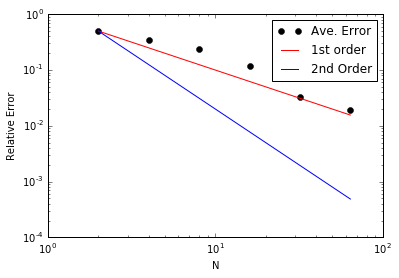

In [23]:
f = lambda t: numpy.sin(t)
N_range = numpy.array([2**n for n in range(1, 7)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = numpy.pi / 2.0

for (i, N) in enumerate(N_range):
    for j in xrange(6):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
        t.sort()
        y = f(t)
        t_star = golden_search([0.1, 3.0 * numpy.pi / 4.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= 6

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.legend()
plt.show()

**Comments**

Trying out golden section search on other problems reveals that we do continue to see linear convergence if we choose a good bracket. Each new function evaluation will bracket the minimum/maximum to a new interval $\phi = \frac{\sqrt(5) - 1}{2}$ times the preceding interval, thus giving linear convergence. 

Basically, golden search works as an optimized bisection method. From lecture, we know that the bisection method is linearly convergent. Since the golden search works the same way, with this phi constant as a way to optmize moving brackets, it follows that golden search will converge linearly as well.